## Module_2: Idiopathic Pulmonary Fibrosis

## Team Members:
Vicente & Will

## Project Title:
Analyzing Idiopathic Pulmonary Fibrosis in Mice



## Project Goal:
This project seeks to develop an image analysis pipeline that predicts the extent of fibrosis in the lung at different biopsy depths from the top of the lung. We are asking the following questions: How does the extent of fibrosis vary throughout the depth of a fibrotic lung? Using interpolation, can we predict the amount of fibrosis at a specific depth into the lung?

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence
Prevalence was estimated to range from 4.0 per 100,000 persons aged 18 to 34 yr to 227.2 per 100,000 among those 75 yr or older; annual incidence was estimated to range from 1.2 to 76.4 per 100,000.

* Risk factors (genetic, lifestyle)
Smoking, air pollution, occupational exposure. Having family history of IPF can also increase the risk of developing IPF

* Symptoms
Shortness of breath.
Dry cough.
Extreme tiredness.
Weight loss that's not intended.
Aching muscles and joints.
Widening and rounding of the tips of the fingers or toes, called clubbing.

* Standard of care treatment(s)
Two FDA-approved antifibrotic drugs: pirfenidone and nintedanib. Both slow lung function decline but cannot cure or reverse damage. Common side effects include gastrointestinal issues (nausea, diarrhea) and photosensitivity/rashes with pirfenidone. Supportive care includes supplemental oxygen, pulmonary rehabilitation, and treatment of comorbidities. Lung transplantation is the only cure but limited to eligible patients.

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
Repeated injury to alveolar epithelial cells triggers abnormal wound healing with excessive scar tissue formation. Damaged cells activate fibroblasts, which differentiate into myofibroblasts that overproduce collagen and resist normal cell death. This scarring thickens alveolar walls, reducing lung compliance and oxygen transfer. Key pathways include TGF-β signaling, Wnt/β-catenin, and oxidative stress. Progressive fibrosis destroys normal lung architecture, creating honeycombing visible on CT scans and ultimately causing respiratory failure.

## Data-Set: 
78 black and white images collected at different depths into fibrotic mouse lung. White dots are fibrotic lesions, and black is healthy lung.

## Data Analyis: 
The following code analyzes the percentage of white pixels in 6 images at different depths of one mouse lung. At the end, it exports a .csv with file names, depths, and percent white pixels.

In [26]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Llobe ch010036.jpg",
    r"C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Llobe ch010019.jpg",
    r"C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Llobe ch010067.jpg",
    r"C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Slobe ch010110.jpg",
    r"C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Llobe ch010168.jpg",
    r"C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Slobe ch010126.jpg"
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    55,
    60,
    1500,
    5300,
    6000,
    6800,
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

Counts of pixel by color in each image
White pixels in image 0: 29677
Black pixels in image 0: 4164627

White pixels in image 1: 31331
Black pixels in image 1: 4162973

White pixels in image 2: 62508
Black pixels in image 2: 4131796

White pixels in image 3: 96012
Black pixels in image 3: 4098292

White pixels in image 4: 99350
Black pixels in image 4: 4094954

White pixels in image 5: 102335
Black pixels in image 5: 4091969

Percent white px:
C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Llobe ch010036.jpg:
0.707554817199707% White | Depth: 55 microns

C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Llobe ch010019.jpg:
0.7469892501831055% White | Depth: 60 microns

C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Llobe ch010067.jpg:
1.4903068542480469% White | Depth: 1500 microns

C:\Users\wcrou\OneDrive - University of Virginia\Desktop\Comp Lung Images\MASK_SK658 Slobe ch01

The following code linearly interpolates a point at depth 3350 microns in a large gap in our data. The actual white pixel percentage is 
1.988%, and the interpolated value is 1.879%. This is about a 5.5% error.

The interpolated point is at the x-coordinate 3350 and y-coordinate 1.879195163124486.


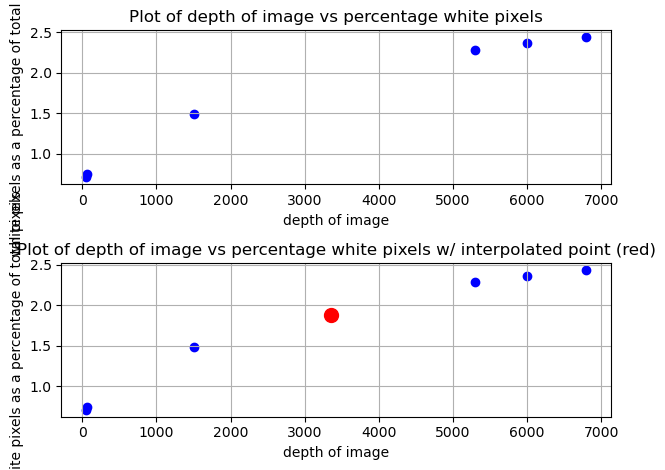

In [27]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = 3350

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The following code QUADRATICALLY interpolates a point at depth 3350 microns in a large gap in our data. The actual white pixel percentage is 1.988%, and the interpolated value is 1.102%. This is about a 44.5% error.

The interpolated point is at the x-coordinate 3350 and y-coordinate 1.1012151255027485.


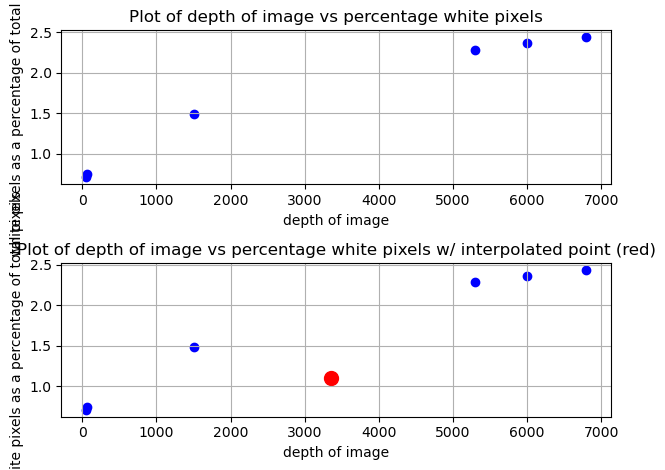

In [28]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = 3350

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The following code linearly interpolates a point at depth 5500 microns in a smaller gap in our data. The actual white pixel percentage is 2.313%, and the interpolated value is 2.311%. This is about a 0.08% error.

The interpolated point is at the x-coordinate 5500 and y-coordinate 2.311842782156808.


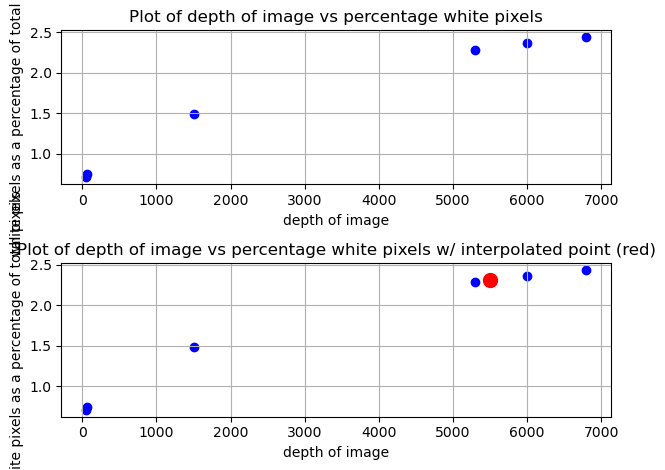

In [29]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = 5500

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Finally, the following code QUADRATICALLY interpolates a point at depth 5500 microns in a smaller gap in our data. The actual white pixel percentage is 2.313%, and the interpolated value is 2.324%. This is about a 0.47% error.

The interpolated point is at the x-coordinate 5500 and y-coordinate 2.3246424797938365.


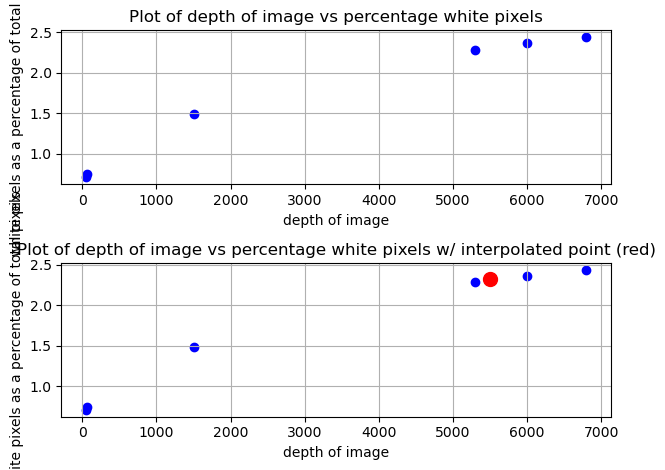

In [30]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = 5500

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Verify and validate your analysis: 
For verifying the code:
We made sure the code was working the way it was supposed to. All images were checked to make sure they loaded properly, the pixel counts added up, and the threshold used to separate white and black pixels made sense when viewed on a few test images. The number of files matched the number of depth entries, and the results written to the CSV were double-checked against manual pixel counts. This confirmed that the code itself was performing the analysis correctly.

To validate the data:
We compared our interpolated predictions to real data points and measured how far off they were. Linear interpolation stayed accurate, while quadratic sometimes gave large errors. We also looked at the thresholded images to make sure “white” regions matched what we expected in the original pictures. When we changed settings slightly, the overall pattern stayed the same, which confirmed that the results are meaningful and not random.

https://pmc.ncbi.nlm.nih.gov/articles/PMC5249201/​

https://pmc.ncbi.nlm.nih.gov/articles/PMC5856260/​

https://pmc.ncbi.nlm.nih.gov/articles/PMC2323681/​

## Conclusions and Ethical Implications: 
Our results show that, though the function is curved, linear interpolation work better for this data, especially in large gaps. Given the small errors with linear interpolation, we can conclude that interpolation can indeed be used to analyze and predict the extent of fibrosis through these mouse lungs.

## Limitations and Future Work: 
There are some obvious limitations to our project. The trend may not accurately reflect the entire sample because we only examined a small number of photos. Even though some images may be darker or lighter than others, which could alter the white-pixel counts, we only used one fixed brightness cutoff (the threshold) for all of the images. Additionally, rather than considering the tissue's three-dimensional structure, we handled each image independently. As a result, our interpolation performs well for this dataset, but without additional testing, we cannot be certain that it would hold true for others.

In the future, we want to increase the analysis's precision and flexibility. We could use automatic thresholding techniques that adjust to the brightness of each image instead of using a single fixed number. Using image-cleaning techniques would also help remove noise and focus only on real features. If we collected more slices at different depths, we could use better curve-fitting techniques and our data trend would be stronger.

## NOTES FROM YOUR TEAM: 
10/3
 - Will out sick
 - Vicente gathered background research on IPF
 
10/7
 - Will imported white pixel percentage code
 - Worked together to finalize notebook check-in 1

10/9
 - Vicente out sick (still showed up to class like a G)
 - Finalized code for interpolations
 - Validation, concluisons, and limitations left to complete

## QUESTIONS FOR YOUR TA: 
None currently!